## Analiza podatkov
Iz spletne strani Okusno.je sem pobral:
* Ime recepta
* Število sestavin
* Število besed v receptu
* Število odstavkov	
* Težavnost
* Čas priprave
* Čas kuhanja	
* Skupni čas	
* Vrsta kuhinje
* Energijska vrednost na porcijo

V spodnji celici je z "#" zakomentirana funkcija m.main, ker proces nabiranja podatkov precej dolg sem ta del že opravil na svojem računalniku. Če pa želite ponovno sami zbrati podatke pa odstranite "#" in po.ženite datoteko. Sicer jo poženite brez, da karkoli spreminjate.

In [90]:
import main as m
import pandas as pd
from pomozne_funkcije import pretvori_cas
%matplotlib inline

#m.main()


In [91]:
RECEPTI=pd.read_csv("podatki.csv")
RECEPTI

,Ime recepta,Število sestavin,Število besed v receptu,Število odstavkov,Težavnost,Čas priprave,Čas kuhanja,Skupni čas,Vrsta kuhinje,Energijska vrednost na porcijo
0,V pečici pečene polnjene (filane) paprike,17,231,7,1,30 min,1 h 40 min,2 h 10 min,Kosilo,146 kCal
1,Sataraš,7,107,4,1,15 min,20 min,35 min,Balkanska,68.62 kCal
2,Solata s stročjim fižolom in krompirjem,13,119,6,1,25 min,15 min,40 min,Solate,80.16 kCal
3,Preprost kolač s slivami,12,180,5,1,15 min,1 h 0 min,1 h 15 min,Sladice,370.4 kCal
4,Affogato,3,45,2,1,5 min,0 min,5 min,Pijača,231.3 kCal
...,...,...,...,...,...,...,...,...,...,...
6582,Čulbastija,5,63,2,1,15 min,30 min,45 min,Balkanska,217.71 kCal
6583,Sadna solata,5,80,4,1,20 min,0 min,20 min,Poletje,49.9 kCal
6584,Brancin iz pečice,10,165,7,2,20 min,1 h 0 min,1 h 20 min,Ribe in morski sadeži,88.23 kCal
6585,Žepki s čemažem in kozjo skuto,8,135,4,2,30 min,20 min,50 min,Vegetarijanstvo,200.3 kCal


Spodaj lahko spreminjate število izrisanih stolpcev, tako da spremenite številko spodaj na mestu "__" v "n = __", ki ga trenutno polni številka 15 ker obstaja preko 80 različnih oznak za vrsto kuhinje na strani okusno.je.


<Axes: xlabel='Vrsta kuhinje'>

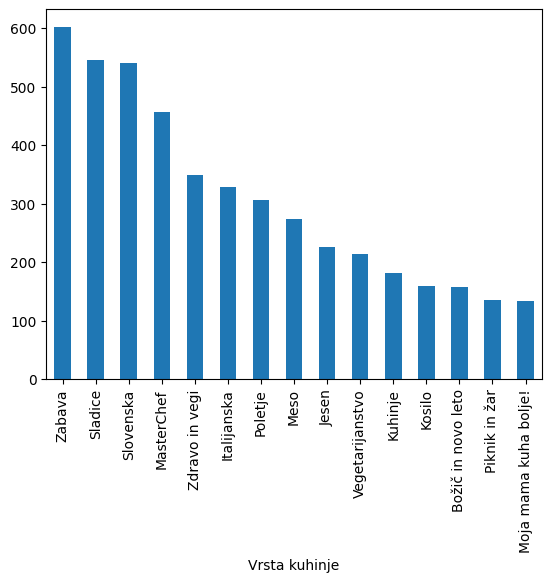

In [92]:
tabela1 = RECEPTI[["Vrsta kuhinje"]].copy()
po_vrsti_kuhinje = tabela1.groupby("Vrsta kuhinje").size()
po_vrsti_kuhinje_urejeno = pd.DataFrame(po_vrsti_kuhinje, columns=['Count']).reset_index().sort_values('Count', ascending=False)
# vzamem "n" (15) stolpcev ker obstaja preko 80 različnih oznak za vrsto kuhinje na strani okusno.je
n = 15
prvih_n = po_vrsti_kuhinje_urejeno.head(n)
prvih_n.plot.bar(x='Vrsta kuhinje', y='Count', legend=False)

Če vas zanimajo vse vrste/tipi kuhinj.

In [93]:
po_vrsti_kuhinje_urejeno['Vrsta kuhinje'].unique()

array(['Zabava', 'Sladice', 'Slovenska', 'MasterChef', 'Zdravo in vegi',
       'Italijanska', 'Poletje', 'Meso', 'Jesen', 'Vegetarijanstvo',
       'Kuhinje', 'Kosilo', 'Božič in novo leto', 'Piknik in žar',
       'Moja mama kuha bolje!', 'Zima', 'Zelenjava', 'Testenine in žita',
       'Pomlad', 'Na hitro', 'Pijača', 'Juhe in jedi na žlico',
       'Skriti šef', 'Azijska', 'Mehiška', 'Valentinovo',
       'Ribe in morski sadeži', 'Velika noč', 'Kaj skuhati',
       'Brez glutena', 'Priložnostno', 'Balkanska',
       'Gorazdova slaščičarna', 'Zdravo, Tereza!', 'Okusi sveta',
       'Domači pripravki', 'Banana na 1001 način', 'Zajtrk',
       'Polona ga žge', 'Pecivo', 'Solate', 'Predjedi in prigrizki',
       'Sezonsko', 'Veganstvo', 'Noč čarovnic',
       'Mesec prazničnih skutnih dobrot', 'Mesec smetanovih jedi',
       'Glavne jedi', 'Barilla', 'Martinovo', 'Brez mesa', 'Priloge',
       'Fit', 'Hofer', 'Omake', 'Pust', 'Jajčne jedi', 'Namazi',
       'Triki in nasveti', 'Dnevi ža

In [94]:
cas_kuhanja=RECEPTI['Skupni čas'].apply(pretvori_cas)
tabela1['Skupni čas (min)']= cas_kuhanja
povprecen_cas=tabela1.groupby('Vrsta kuhinje')['Skupni čas (min)'].mean().apply(int)
povprecen_cas


Vrsta kuhinje
Ana kuha                23
Azijska                 54
Balkanska               79
Banana na 1001 način    50
Barilla                 22
                        ..
Zdravo in vegi          37
Zdravo, Tereza!         44
Zelenjava               51
Zero waste              60
Zima                    95
Name: Skupni čas (min), Length: 79, dtype: int64

Zanima me povprečen čas celotne sladic. Če vas zanima, povprečen čas kakšne druge specifične kuhinje lahko v spodnjem izrazu zamenjate "Sladice" z imenom te kuhinje z zgornjega seznama in poženete celoten program.

In [95]:
str(povprecen_cas["Sladice"]//1)+" min"

'69 min'

Kot lahko vidimo, se sladice pripravljajo povprečno 69 minut.

Če nas zanima kako povprečni časi primerjajo vizualno, lahko to vidimo na spodnjem grafu. Zaradi preglednosti sem prikaz omejil na le 30 najdaljših časov.

<Axes: xlabel='Vrsta kuhinje'>

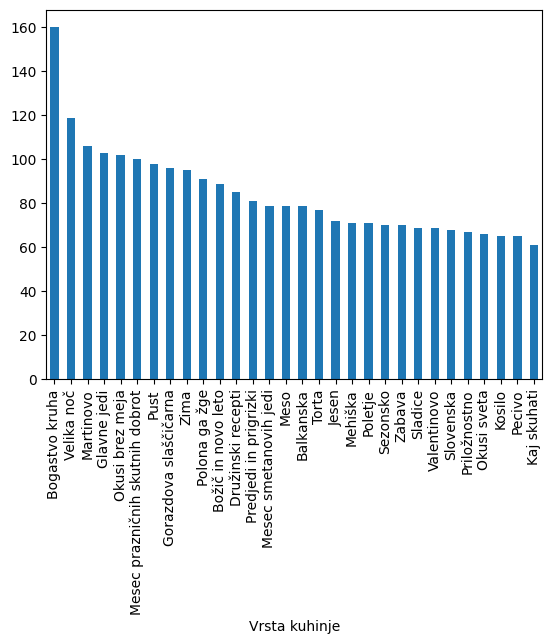

In [96]:
graf = pd.DataFrame(povprecen_cas).reset_index().sort_values('Skupni čas (min)', ascending=False).head(30)
graf.plot(kind='bar', x='Vrsta kuhinje', y='Skupni čas (min)', legend=False)

Kot vidimo ima najdaljši čas priprave vrsta kuninje "Bogastvo kruha"

Vsak recept ima določeno tudi težavnost,ki so jo pisci recepta določili na lestvici od 1 do 3 (1-lahko, 3-težko). Na spodnjemu grafu lahko vidimo, da je velika večina receptov (približno 63%) težavnosti 1.

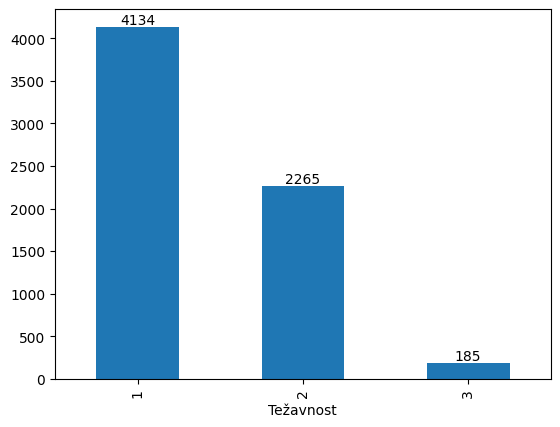

In [97]:
tabela2 = RECEPTI[["Težavnost"]].copy()
po_težavnosti = tabela2.groupby("Težavnost").size()

resetan_index = pd.DataFrame(po_težavnosti, columns=['Count']).reset_index().sort_values('Count', ascending=False)

# vzamem samo 3 stolpce ker obstaja še 4. stolpec, kjer so recepti ki niso imeli težavnosti

res_top_n = resetan_index.head(3)
#oštevilčenje
graf = res_top_n.plot.bar(x='Težavnost', y='Count', legend=False)
for index, value in enumerate(res_top_n['Count']):
    graf.text(index, value, str(value), ha='center', va='bottom')



Kaj pa glede na posamezno vrsto kuhinje? Poglejmo si za azijsko kuhinjo.

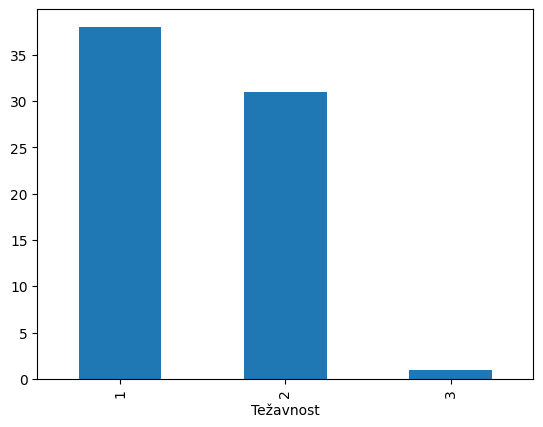

In [98]:
tabela3 = RECEPTI[["Vrsta kuhinje","Težavnost"]].copy()
po_težavnosti_specifično = tabela3.groupby("Težavnost")['Vrsta kuhinje'].value_counts().unstack(fill_value=0).tail(3)#value_counts prešteje ocene #unstack pretvori nazaj v dataframe #tail pa vzame samo 3 ocene ker so narobe označene ocene z 0
graf2=po_težavnosti_specifično["Azijska"].plot(kind='bar')




Azijka kuhinja ima nekaj manj kot 40 receptov težavnosti 1, nekaj več kot 30 ocene 2, in tudi 1 recept težavnosti 3.

Povprečne težavnosti pa niso tako zanimive zaradi velike prevlade ocene težavnosti 1.

In [99]:
tabela4=RECEPTI[["Vrsta kuhinje","Težavnost"]].copy()
povprecna_tezavnost=tabela4.groupby('Vrsta kuhinje')["Težavnost"].mean()
povprecna_tezavnost

Vrsta kuhinje
Ana kuha                1.000000
Azijska                 1.471429
Balkanska               1.622222
Banana na 1001 način    1.264706
Barilla                 1.000000
                          ...   
Zdravo in vegi          1.143678
Zdravo, Tereza!         1.052632
Zelenjava               1.252174
Zero waste              1.000000
Zima                    1.524590
Name: Težavnost, Length: 79, dtype: float64

Poflejmo kakšno je razmerje med številom besed v receptu in težavnostjo:

<Axes: xlabel='Število besed v receptu'>

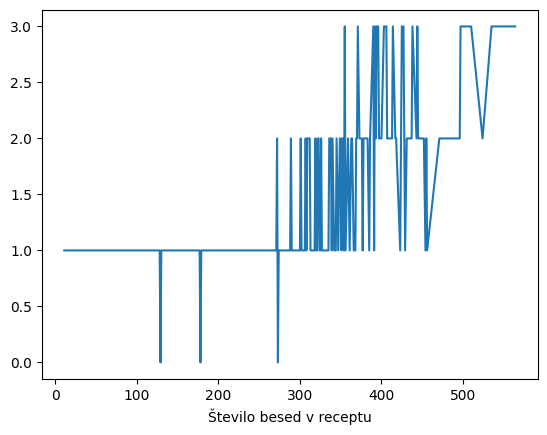

In [100]:
tabela5=RECEPTI[["Število besed v receptu","Težavnost"]].copy()
tezavnost_besede=tabela5.groupby('Število besed v receptu')["Težavnost"].min()
tezavnost_besede.plot()

Kot lahko vidimo težavnost narašča sorazmerno s številom besed, vidne so pa tudi ocene treh receptov, ki niso imeli ocene, zaradi česar imajo oceno 0.

Poglejmo še kako se spreminja skupni čas v odvisnosti od težavnosti.

<Axes: xlabel='Težavnost'>

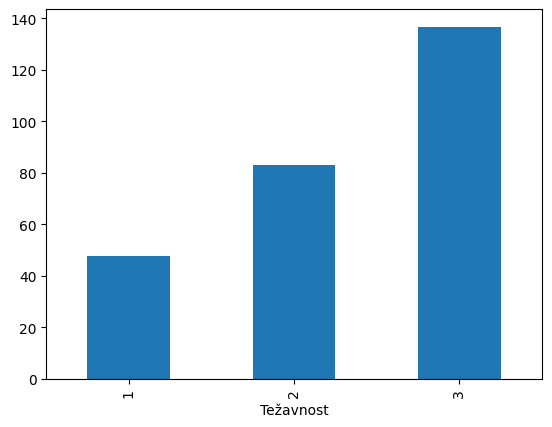

In [101]:
cas_kuhanja=RECEPTI['Skupni čas'].apply(pretvori_cas)
tabela5['Skupni čas (min)']= cas_kuhanja
tabela5.groupby('Težavnost')['Skupni čas (min)'].mean().tail(3).plot(kind='bar')


Kot vidimo se tudi povprečen skupni čas povečuje sorazmerno s težavnostjo

Zdaj pa poglejmo kako, ali je število besed v sorazmerju s številom odstavkov.

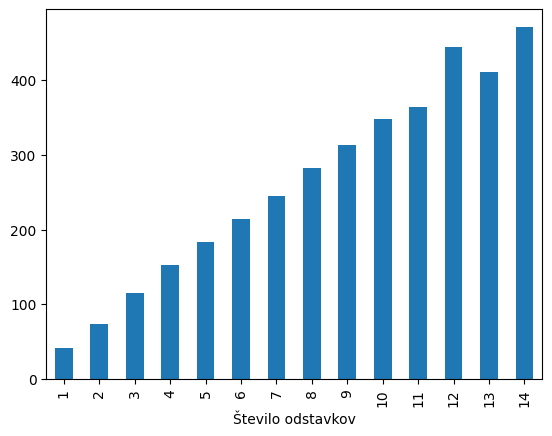

In [110]:
tabela6=RECEPTI[["Število besed v receptu","Število odstavkov"]].copy()
graf1=tabela6.groupby("Število odstavkov")["Število besed v receptu"].mean().plot(kind='bar')


Kot vidimo je besedilo enakomerno sorazmerno členjeno na odstavke.